# Hands-on Practice for  FPM Module

### 0. Exploring properties of the dataset T10I4D100K_new.dat

Printing the head and tail of the data 

<span style="color:red">**Question:** </span> How many items are present in the datafile T10I4D100K_new? 

In [13]:
!head T10I4D100K_new.dat

'head' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
!awk -- '{for (i = 1; i <= NF; i++) wc[$i] += 1}; END {print length(wc)}' T10I4D100K_new.dat 

The system cannot find the file specified.


<span style="color:green">Answer: </span> Number of items in the data file T10I4D100K_new are 871

<span style="color:red">**Question:** </span> How many transactions are present in the datafile? 

In [3]:
!wc -l T10I4D100K_new.dat

148983 T10I4D100K_new.dat


<span style="color:green">Answer: </span> Number of transactions in the data file T10I4D100K_new are 148983

### 1. Generating a synthetic dataset

<span style="color:red">**Question:** </span> Generate a random synthetic dataset with 15 transactions and 10. 

In [4]:
import numpy as np
data = np.random.randint(2, size=(15,10))
data

array([[1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 0, 1, 0, 1, 0, 0]])

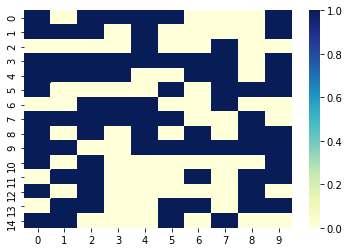

In [6]:
import seaborn as sb
sb.heatmap(data,cmap='YlGnBu')

<span style="color:red">**Question:** </span> Generate a synthetic dataset with 15 transactions and 10 that contains one maximal itemset with 10 supporting transactions and 8 items. 

In [7]:
def data_matrix_generation(total_rows, total_cols, datablock_rows, datablock_cols):
    count = total_rows
    data = np.zeros((total_rows,total_cols), dtype = int)
    data[0:datablock_rows,0:datablock_cols] =1
    return data

In [8]:
data = data_matrix_generation(15, 10, 10, 8)
data

array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

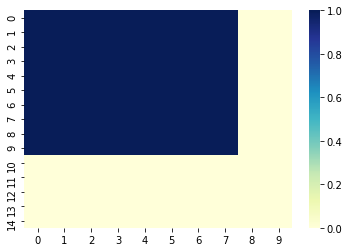

In [26]:
import seaborn as sb
sb.heatmap(data,cmap='YlGnBu')

### 2. Generating frequent, maximal and closed itemsets using $\color{red}{\text{Apriori}}$ algorithm from the dataset T10I4D100K_new.dat

Download the linux executable for apriori from here: http://www.borgelt.net/apriori.html

In [4]:
!chmod u+x apriori

In [5]:
!./apriori

usage: ./apriori [options] infile [outfile]
find frequent item sets with the apriori algorithm
version 6.27 (2017.08.01)        (c) 1996-2017   Christian Borgelt
-t#      target type                              (default: s)
         (s: frequent, c: closed, m: maximal item sets,
          g: generators, r: association rules)
-m#      minimum number of items per set/rule     (default: 1)
-n#      maximum number of items per set/rule     (default: no limit)
-s#      minimum support of an item set/rule      (default: 10%)
-S#      maximum support of an item set/rule      (default: 100%)
         (positive: percentage, negative: absolute number)
-o       use original rule support definition     (body & head)
-c#      minimum confidence of an assoc. rule     (default: 80%)
-e#      additional evaluation measure            (default: none)
-a#      aggregation mode for evaluation measure  (default: none)
-d#      threshold for add. evaluation measure    (default: 10%)
-i       invalidate eva

<span style="color:red">**Question:** </span>Generate the **frequent itemsets** using apriori with minsup = 100 and write them to a file.

In [33]:
!./apriori -ts -s-100 T10I4D100K_new.dat T_AP_Freq_S100.txt

./apriori - find frequent item sets with the apriori algorithm
version 6.27 (2017.08.01)        (c) 1996-2017   Christian Borgelt
reading T10I4D100K_new.dat ... [870 item(s), 99936 transaction(s)] done [0.08s].
filtering, sorting and recoding items ... [797 item(s)] done [0.00s].
sorting and reducing transactions ... [89066/99936 transaction(s)] done [0.02s].
building transaction tree ... [112796 node(s)] done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 done [0.32s].
writing T_AP_Freq_S100.txt ... [27523 set(s)] done [0.01s].


Visualizing the first 10 patterns generated with support >= 100. 

In [7]:
!head T_AP_Freq_S100.txt

729 (102)
199 (109)
330 (102)
62 (110)
856 (109)
856 490 906 (103)
856 490 (103)
856 906 (103)
102 (109)
228 (118)


Visualizing the last 10 patterns generated with support >= 100.

In [8]:
!tail T_AP_Freq_S100.txt

766 (6261)
766 829 (321)
766 529 (317)
766 368 (503)
829 (6806)
829 529 (583)
829 368 (1193)
529 (7050)
529 368 (639)
368 (7823)


<span style="color:red">**Question:** </span>
What is the total number of frequent patterns generated using apriori with minsup = 100?

In [9]:
!wc -l T_AP_Freq_S100.txt

27523 T_AP_Freq_S100.txt


<span style="color:green">Answer: </span>Number of frequent patterns in the file are 27523

<span style="color:red">**Question:** </span>
What is the number of frequent patterns generated for each itemset size?

In [34]:
!awk '{print NF-1}' T_AP_Freq_S100.txt|sort -n|uniq -c

    797 1
   8826 2
   7128 3
   5499 4
   3187 5
   1429 6
    503 7
    129 8
     23 9
      2 10


<span style="color:red">**Question:** </span>
Determine the time taken by apriori to generate frequent patterns. Do not write the patterns to a file to get the best estimate of time taken to discover frequent patterns.

In [35]:
import datetime 
start = datetime.datetime.now()
!./apriori -ts -s-100 T10I4D100K_new.dat 
end = datetime.datetime.now()
elapsed = end - start
print(elapsed.seconds,"secs ",elapsed.microseconds,"microsecs");

./apriori - find frequent item sets with the apriori algorithm
version 6.27 (2017.08.01)        (c) 1996-2017   Christian Borgelt
reading T10I4D100K_new.dat ... [870 item(s), 99936 transaction(s)] done [0.07s].
filtering, sorting and recoding items ... [797 item(s)] done [0.00s].
sorting and reducing transactions ... [89066/99936 transaction(s)] done [0.01s].
building transaction tree ... [112796 node(s)] done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 done [0.33s].
writing <null> ... [27523 set(s)] done [0.00s].
(0, 'secs ', 673239, 'microsecs')


<span style="color:green">Answer: </span>Time taken by apriori to generate frequent itemsets with minsup = 100 is 1.1800 secs.


<span style="color:red">**Question:** </span>
Generate the **maximal frequent itemsets** with minsup = 100. Use **-tm** for *maximal* itemsets and report the number of maximal itemsets.

In [36]:
!./apriori -tm -s-100 T10I4D100K_new.dat T_AP_Maximal_S100.txt

./apriori - find frequent item sets with the apriori algorithm
version 6.27 (2017.08.01)        (c) 1996-2017   Christian Borgelt
reading T10I4D100K_new.dat ... [870 item(s), 99936 transaction(s)] done [0.07s].
filtering, sorting and recoding items ... [797 item(s)] done [0.00s].
sorting and reducing transactions ... [89066/99936 transaction(s)] done [0.02s].
building transaction tree ... [112796 node(s)] done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 done [0.34s].
filtering for maximal item sets ... done [0.04s].
writing T_AP_Maximal_S100.txt ... [4061 set(s)] done [0.00s].


<span style="color:green">Answer: </span> There are 4061 maximal itemsets

<span style="color:red">**Question:** </span>
Generate the **closed itemsets** with minsup = 100. Use **-tc** for *closed* itemsets and report the number of closed itemsets.

In [37]:
!./apriori -tc -s-100 T10I4D100K_new.dat T_AP_Closed_S100.txt

./apriori - find frequent item sets with the apriori algorithm
version 6.27 (2017.08.01)        (c) 1996-2017   Christian Borgelt
reading T10I4D100K_new.dat ... [870 item(s), 99936 transaction(s)] done [0.07s].
filtering, sorting and recoding items ... [797 item(s)] done [0.00s].
sorting and reducing transactions ... [89066/99936 transaction(s)] done [0.02s].
building transaction tree ... [112796 node(s)] done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 done [0.32s].
filtering for closed item sets ... done [0.17s].
writing T_AP_Closed_S100.txt ... [26797 set(s)] done [0.00s].


<span style="color:green">Answer: </span> There are 26797 closed itemsets

### 3. Generating frequent, maximal and closed itemsets using $\color{red}{\text{ECLAT}}$ algorithm from the dataset T10I4D100K_new.dat

Download the linux executable for ECLAT from here: http://www.borgelt.net/eclat.html

In [38]:
!chmod u+x eclat

In [15]:
!./eclat

usage: ./eclat [options] infile [outfile]
find frequent item sets with the eclat algorithm
version 5.20 (2017.05.30)        (c) 2002-2017   Christian Borgelt
-t#      target type                              (default: s)
         (s: frequent, c: closed, m: maximal item sets,
          g: generators, r: association rules)
-m#      minimum number of items per set/rule     (default: 1)
-n#      maximum number of items per set/rule     (default: no limit)
-s#      minimum support of an item set/rule      (default: 10%)
-S#      maximum support of an item set/rule      (default: 100%)
         (positive: percentage, negative: absolute number)
-o       use original rule support definition     (body & head)
-c#      minimum confidence of an assoc. rule     (default: 80%)
-e#      additional evaluation measure            (default: none)
-a#      aggregation mode for evaluation measure  (default: none)
-d#      threshold for add. evaluation measure    (default: 10%)
-i       invalidate eval. b

<span style="color:red">**Question:** </span>
Generate **Frequent Itemsets** using eclat with minsup = 100 and  and report the number of frequent itemsets.

In [16]:
!./eclat -ts -s-100 T10I4D100K_new.dat T_EC_Freq_S100.txt

./eclat - find frequent item sets with the eclat algorithm
version 5.20 (2017.05.30)        (c) 2002-2017   Christian Borgelt
reading T10I4D100K_new.dat ... [870 item(s), 99936 transaction(s)] done [0.07s].
filtering, sorting and recoding items ... [797 item(s)] done [0.00s].
sorting and reducing transactions ... [89066/99936 transaction(s)] done [0.02s].
writing T_EC_Freq_S100.txt ... [27523 set(s)] done [0.12s].


<span style="color:green">Answer: </span>Number of frequent patterns in the file are 27523

<span style="color:red">**Question:** </span>
Generate the **Maximal Itemsets** using eclat with minsup = 100 and report the number of maximal itemsets.

In [17]:
!./eclat -tm -s-100 T10I4D100K_new.dat T_EC_Maximal_S100.txt

./eclat - find frequent item sets with the eclat algorithm
version 5.20 (2017.05.30)        (c) 2002-2017   Christian Borgelt
reading T10I4D100K_new.dat ... [870 item(s), 99936 transaction(s)] done [0.08s].
filtering, sorting and recoding items ... [797 item(s)] done [0.00s].
sorting and reducing transactions ... [89066/99936 transaction(s)] done [0.03s].
writing T_EC_Maximal_S100.txt ... [4061 set(s)] done [0.14s].


<span style="color:green">Answer: </span> There are 4061 maximal itemsets

<span style="color:red">**Question:** </span>
Generate the **Closed Itemsets** with minsup = 100 and report the number of closed itemsets.

In [18]:
!./eclat -tc -s-100 T10I4D100K_new.dat T_EC_Closed_S100.txt

./eclat - find frequent item sets with the eclat algorithm
version 5.20 (2017.05.30)        (c) 2002-2017   Christian Borgelt
reading T10I4D100K_new.dat ... [870 item(s), 99936 transaction(s)] done [0.05s].
filtering, sorting and recoding items ... [797 item(s)] done [0.01s].
sorting and reducing transactions ... [89066/99936 transaction(s)] done [0.03s].
writing T_EC_Closed_S100.txt ... [26797 set(s)] done [0.10s].


<span style="color:green">Answer: </span> There are 26797 closed itemsets

### 4. Generating frequent, maximal and closed itemsets using $\color{red}{\text{FPGrowth}}$ algorithm from the dataset T10I4D100K_new.dat

Download the linux executable for FPGrowth from here: http://www.borgelt.net/fpgrowth.html

In [19]:
!chmod u+x fpgrowth

In [20]:
!./fpgrowth

usage: ./fpgrowth [options] infile [outfile]
find frequent item sets with the fpgrowth algorithm
version 6.17 (2017.05.30)        (c) 2004-2017   Christian Borgelt
-t#      target type                              (default: s)
         (s: frequent, c: closed, m: maximal item sets,
          g: generators, r: association rules)
-m#      minimum number of items per set/rule     (default: 1)
-n#      maximum number of items per set/rule     (default: no limit)
-s#      minimum support of an item set/rule      (default: 10%)
-S#      maximum support of an item set/rule      (default: 100%)
         (positive: percentage, negative: absolute number)
-o       use original rule support definition     (body & head)
-c#      minimum confidence of an assoc. rule     (default: 80%)
-e#      additional evaluation measure            (default: none)
-a#      aggregation mode for evaluation measure  (default: none)
-d#      threshold for add. evaluation measure    (default: 10%)
-i       invalidate e

<span style="color:red">**Question:** </span>
Generate **frequent Itemsets** using fpgrowth with minsup = 100 and report the number of frequent itemsets.

In [21]:
!./fpgrowth -ts -s-100 T10I4D100K_new.dat T_FP_Freq_S100.txt

./fpgrowth - find frequent item sets with the fpgrowth algorithm
version 6.17 (2017.05.30)        (c) 2004-2017   Christian Borgelt
reading T10I4D100K_new.dat ... [870 item(s), 99936 transaction(s)] done [0.07s].
filtering, sorting and recoding items ... [797 item(s)] done [0.00s].
sorting and reducing transactions ... [89066/99936 transaction(s)] done [0.02s].
writing T_FP_Freq_S100.txt ... [27523 set(s)] done [0.17s].


<span style="color:green">Answer: </span>Number of frequent patterns in the file are 27523

<span style="color:red">**Question:** </span>
Generate the **maximal Itemsets** with minsup = 100 and report the number of maximal itemsets.

In [22]:
!./fpgrowth -tm -s-100 T10I4D100K_new.dat T_FP_Maximal_S100.txt

./fpgrowth - find frequent item sets with the fpgrowth algorithm
version 6.17 (2017.05.30)        (c) 2004-2017   Christian Borgelt
reading T10I4D100K_new.dat ... [870 item(s), 99936 transaction(s)] done [0.06s].
filtering, sorting and recoding items ... [797 item(s)] done [0.00s].
sorting and reducing transactions ... [89066/99936 transaction(s)] done [0.02s].
writing T_FP_Maximal_S100.txt ... [4061 set(s)] done [0.17s].


<span style="color:green">Answer: </span> There are 4061 maximal itemsets

<span style="color:red">**Question:** </span>
Generate the **closed Itemsets** with minsup = 100 and report the number of closed itemsets.

In [23]:
!./fpgrowth -tc -s-100 T10I4D100K_new.dat T_FP_Closed_S100.txt

./fpgrowth - find frequent item sets with the fpgrowth algorithm
version 6.17 (2017.05.30)        (c) 2004-2017   Christian Borgelt
reading T10I4D100K_new.dat ... [870 item(s), 99936 transaction(s)] done [0.06s].
filtering, sorting and recoding items ... [797 item(s)] done [0.00s].
sorting and reducing transactions ... [89066/99936 transaction(s)] done [0.02s].
writing T_FP_Closed_S100.txt ... [26797 set(s)] done [0.17s].


<span style="color:green">Answer: </span> There are 26797 closed itemsets

<span style="color:red">**Question:** </span>
Determine the number of Frequent Itemsets generated for different minsup 10,100,1000.

<span style="color:green">Answer: </span>

|   Frequency Count          |Itemsets Generated  |   
|----------------------------|--------------------|     
|10                          |?                   |  
|100                         |27523               | 
|1000                        |?                   |   


<span style="color:red">**Question:** </span> Compute the run time for the three algorithms: Apriori, ECLAT, FPGrowth. Consider minsup=10,100, and 1000.

<span style="color:green">Answer: </span>


|   Algorithm                |minsup=10           |minsup=100          |minsup=1000         |
|----------------------------|--------------------|--------------------|--------------------|    
|Apriori                     |1.88                |0.68                |0.32                |
|Eclat                       |0.68                |0.46                |0.33                |
|FPGrowth                    |0.86                |0.57                |0.40                |


### 5. Sequence Mining: Finding subsequences that are frequent

PrefixSpan is another name for the projection based approach for discovering frequent subsequences. The implementation of prefixspan is available here: https://code.google.com/archive/p/prefixspan/

In [24]:
!chmod u+x prefixspan

In [26]:
!./prefixspan

PrefixSpan version 1.00 - Sequential Pattern Miner
Written by Yasuo Tabei


Usage: prefixspan [OPTION]... INFILE

       where [OPTION]...  is a list of zero or more optional arguments
             INFILE(s)    is the name of the input transaction database

Additional arguments (at most one input file may be specified):
       -min_sup [minimum support]
       -max_pat [maximum pattern]



<span style="color:red">**Question:** </span>
Using a sequence database: ABCAB, CBABA, ABABC, ACABC, BAACB, ACACC,
find frequent sequences using a level-wise approach. Use minsup=3.


In [29]:
!cat activities_data.dat

1 2 3 1 2
3 2 1 2 1
1 2 1 2 3
1 3 1 2 3
2 1 1 3 2
1 3 1 3 3


In [30]:
!./prefixspan -min_sup 3 activities_data.dat

PrefixSpan version 1.00 - Sequential Pattern Miner
Written by Yasuo Tabei


( 0 1 2 3 4 5 ) : 6
1 
( 0 1 2 3 4 5 ) : 6
1 1 
( 0 1 2 3 4 5 ) : 6
1 1 2 
( 0 2 3 4 ) : 4
1 1 3 
( 2 3 4 5 ) : 4
1 2 
( 0 1 2 3 4 ) : 5
1 2 1 
( 0 1 2 ) : 3
1 2 3 
( 0 2 3 ) : 3
1 3 
( 0 2 3 4 5 ) : 5
1 3 1 
( 0 3 5 ) : 3
1 3 2 
( 0 3 4 ) : 3
2 
( 0 1 2 3 4 ) : 5
2 1 
( 0 1 2 4 ) : 4
2 1 2 
( 0 1 2 4 ) : 4
2 2 
( 0 1 2 4 ) : 4
2 3 
( 0 2 3 4 ) : 4
3 
( 0 1 2 3 4 5 ) : 6
3 1 
( 0 1 3 5 ) : 4
3 1 2 
( 0 1 3 ) : 3
3 2 
( 0 1 3 4 ) : 4


Printing only the subsequences without the supporting transactions

In [29]:
!./prefixspan -min_sup 3 activities_data.dat| sed -n 'p;n'

PrefixSpan version 1.00 - Sequential Pattern Miner
Written by Yasuo Tabei


1 
1 1 
1 2 
1 2 1 
1 3 
2 
2 1 
2 1 1 
2 2 
2 3 
3 
3 1 
3 1 1 
3 2 
3 2 1 
3 3 


Writing the frequent subsequences to a file

In [30]:
!./prefixspan -min_sup 3 activities_data.dat| sed -n 'p;n'> subseq_activities_data_minsup_3

PrefixSpan version 1.00 - Sequential Pattern Miner
Written by Yasuo Tabei



In [31]:
!tail subseq_activities_data_minsup_3

2 1 
2 1 1 
2 2 
2 3 
3 
3 1 
3 1 1 
3 2 
3 2 1 
3 3 


### 6. Sequence Mining: discovering frequent substrings

Substring mining code is available here: http://www.borgelt.net/seqwog.html

In [32]:
!chmod u+x seqwog

In [33]:
!./seqwog

usage: ./seqwog [options] infile [outfile]
find frequent sequences without gaps
version 3.16 (2016.10.15)        (c) 2010-2016   Christian Borgelt
-t#      target type                              (default: s)
         (s: frequent, c: closed, m: maximal sequences, r: rules)
         (target type 'r' implies -a (all occurrences))
-m#      minimum number of items per sequence     (default: 1)
-n#      maximum number of items per sequence     (default: no limit)
-s#      minimum support of a sequence            (default: 10%)
         (positive: percentage, negative: absolute number)
-o       use original rule support definition     (body & head)
-c#      minimum confidence of a     rule         (default: 80%)
-a       count all occurrences of a pattern       (default: #sequences)
-F#:#..  support border for filtering item sets   (default: none)
         (list of minimum support values, one per item set size,
         starting at the minimum size, as given with option -m#)
-P#      write

<span style="color:red">**Question:** </span>
Using a sequence database: ABCAB, CBABA, ABABC, ACABC, BAACB, ACACC,
find frequent substrings using minsup=3.


In [31]:
!./seqwog -ts -s-3 activities_data.dat substring_result

./seqwog - find frequent sequences without gaps
version 3.16 (2016.10.15)        (c) 2010-2016   Christian Borgelt
reading activities_data.dat ... [3 item(s), 6 transaction(s)] done [0.00s].
recoding items ... [3 item(s)] done [0.00s].
reducing and triming transactions ... [6 transaction(s)] done [0.00s].
writing substring_result ... [9 sequence(s)] done [0.00s].


In [32]:
!cat substring_result

3 1 (3)
3 (6)
2 1 (3)
2 3 (3)
2 (5)
1 2 3 (3)
1 2 (4)
1 3 (3)
1 (6)
